In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import gamma, gmean, mode, norm
from scipy.optimize import minimize
from scipy.special import gammaln, psi
from scipy.stats import gmean, skew, kurtosis
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

In [42]:
def graficar_3d(pos_x, pos_y, ruta_img, titulo):
    plt.style.use('dark_background')
    tiempo = range(len(pos_x))
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(pos_x, pos_y, tiempo, '-o', label='Caminante', linewidth=0.1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Tiempo')

    ax.set_title(titulo)
    ax.legend()
    plt.savefig(ruta_img, format='pdf', bbox_inches='tight')
    plt.show()

In [43]:
def aplicar_rice(n):
    return int(np.ceil(2 * (n ** (1/3))))


def hist_3d(pos_x, pos_y, ruta_img, titulo):
    plt.style.use('dark_background')
    pos_x = np.array(pos_x)
    pos_y = np.array(pos_y)

    bins = aplicar_rice(len(pos_x))
    
    # Calcular el histograma 2D con los bins calculados
    hist, xedges, yedges = np.histogram2d(pos_x, pos_y, bins=[bins, bins])
    
    # Filtro para asegurarnos de que sólo incluyamos barras con altura no nula
    nonzero = hist != 0
    
    # Preparar los centros de los bins para el plotting
    xpos, ypos = np.meshgrid(xedges[:-1] + np.diff(xedges)/2, yedges[:-1] + np.diff(yedges)/2)
    xpos = xpos[nonzero]
    ypos = ypos[nonzero]
    zpos = 0
    
    # Dimensiones de las barras
    dx = dy = np.ones_like(zpos) * (xedges[1] - xedges[0])
    dz = hist[nonzero]
    
    # Crear la figura y el eje para el plot 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plotear las barras
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    
    # Etiquetas y título
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Frecuencia')
    plt.title(titulo)
    
    plt.savefig(ruta_img, format='pdf', bbox_inches='tight')
    plt.show()

In [44]:
def plotear_hist(array: np.ndarray, titulo: str, label_x: str, label_y: str, ruta_img: str, criterio: str = 'sturges') -> None:
    """
    Genera y guarda un histograma con estilos personalizados, colores aleatorios para cada barra,
    y el número de bins determinado por el criterio especificado.

    Args:
        array (np.ndarray): Array de Numpy con los datos que se quieren plasmar en el histograma.
        titulo (str): Título del histograma.
        label_x (str): Etiqueta del eje x del histograma.
        label_y (str): Etiqueta del eje y del histograma.
        ruta_img (str): Ruta donde se guardará la imagen del histograma.
        criterio (str): Método para calcular el número de bins ('sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', 'rice').

    Returns:
        None: La función no retorna nada.
    """
    plt.style.use('dark_background')
    
    match criterio:
        case 'sturges':
            bins = int(1 + np.log2(len(array)))
        case 'freedman-diaconis':
            iqr = np.subtract(*np.percentile(array, [75, 25]))
            bin_width = 2 * iqr * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
        case 'scott':
            bin_width = 3.5 * np.std(array) * len(array) ** (-1/3)
            bins = int(np.ptp(array) / bin_width)
        case 'raiz_cuadrada':
            bins = int(np.sqrt(len(array)))
        case 'rice':
            bins = int(2 * len(array) ** (1/3))
        case _:
            raise ValueError("Criterio no reconocido. Usa 'sturges', 'freedman-diaconis', 'scott', 'raiz_cuadrada', o 'rice'.")

    n, bins, patches = plt.hist(array, bins=bins, alpha=0.75, rwidth=0.85)

    for patch in patches:
        plt.setp(patch, 'facecolor', np.random.rand(3,))
        
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.title(titulo, fontsize=20, fontweight='bold', color=np.random.rand(3,))
    plt.xlabel(label_x, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylabel(label_y, fontsize=15, fontstyle='italic', color=np.random.rand(3,))
    plt.ylim(0, max(n)*1.1)
    plt.savefig(ruta_img, format='pdf', bbox_inches='tight')
    plt.show()


In [45]:
def graficar(x, y, ruta_img, titulo="Gráfica de Puntos", x_label="Eje X", y_label="Eje Y", color_puntos='tab:blue'):
    """
    Crea y muestra una gráfica de puntos estilizada de los valores x, y.

    Parámetros:
    - x: Lista de valores en el eje X.
    - y: Lista de valores en el eje Y.
    - titulo: Título de la gráfica.
    - x_label: Etiqueta para el eje X.
    - y_label: Etiqueta para el eje Y.
    - color_puntos: Color de los puntos.
    """

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'o', color=color_puntos, label='Distribución', markersize=2)

    plt.title(titulo, fontsize=20, fontweight='bold', color=color_puntos)
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.legend()
    plt.savefig(ruta_img, format='pdf', bbox_inches='tight')
    # Mostrar gráfica
    plt.show()

In [46]:
class DistribucionProbabilidad:
    def __init__(self, datos):
        self.datos = np.array(datos)
        self.n = len(datos)
    
    def media(self):
        return np.mean(self.datos)
    
    def mediana(self):
        return np.median(self.datos)
    
    def moda(self):
        mode_res = stats.mode(self.datos)
        if np.isscalar(mode_res.count):
            return mode_res.mode
        else:
            return mode_res.mode if mode_res.count[0] > 1 else mode_res.mode[0]
    
    def media_geometrica(self):
        return gmean(self.datos)
    
    def asimetria(self):
        return skew(self.datos)
    
    def rango(self):
        return np.max(self.datos) - np.min(self.datos)
    
    def desviacion_estandar(self):
        return np.std(self.datos, ddof=1)
    
    def varianza(self):
        return np.var(self.datos, ddof=1)
    
    def coeficiente_variacion(self):
        return self.desviacion_estandar() / self.media()
    
    def percentil(self, p):
        if 0 <= p <= 100:
            return np.percentile(self.datos, p)
        else:
            raise ValueError("El percentil debe estar entre 0 y 100.")
    
    def cuartil(self, q):
        if q in [1, 2, 3]:
            return self.percentil(q * 25)
        else:
            return np.nan
    
    def curtosis(self):
        return kurtosis(self.datos)
    
    def entropia(self):
        p, counts = np.unique(self.datos, return_counts=True)
        p = counts / len(self.datos)
        return -np.sum(p * np.log(p))
    
    def calcular_metricas(self, percentil, cuartil):
        resultados = {
            'Media': self.media(),
            'Mediana': self.mediana(),
            'Moda': self.moda(),
            'Media Geométrica': self.media_geometrica(),
            'Rango': self.rango(),
            'Desviación Estándar': self.desviacion_estandar(),
            'Varianza': self.varianza(),
            f'Percentil {percentil}': self.percentil(percentil),
            f'Cuartil {cuartil}': self.cuartil(cuartil),
            'Asimetría': self.asimetria(),
            'Coeficiente de Variación': self.coeficiente_variacion(),
            'Curtosis': self.curtosis(),
            'Entropía': self.entropia()
        }
        
        for metrica, valor in resultados.items():
            print(f"{metrica}: {valor}")


In [47]:
def cargar_csv(ruta:str, separador:str):

    try:
        with open(ruta, 'r', encoding='utf-8') as archivo:
            lineas = archivo.readlines()

            datos = [linea.strip().split(separador) for linea in lineas]

            return datos[0]
    except FileNotFoundError:
        print("El archivo no fue encontrado.")
        return []

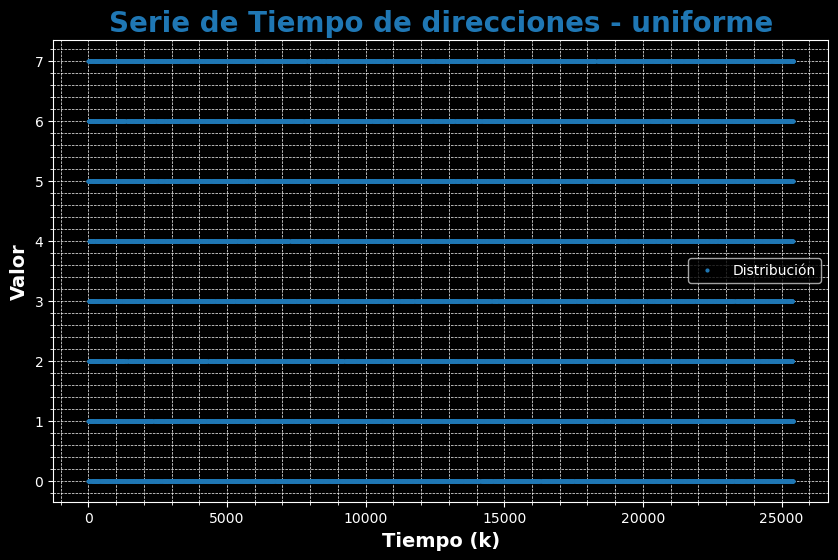

Media: 3.51282858492051
Mediana: 4.0
Moda: 1
Media Geométrica: 0.0
Rango: 7
Desviación Estándar: 2.310129305869035
Varianza: 5.336697409834949
Percentil 20: 1.0
Cuartil 3: 6.0
Asimetría: -0.0029643161914408604
Coeficiente de Variación: 0.6576265394177523
Curtosis: -1.2637414575100387
Entropía: 2.07881609358905


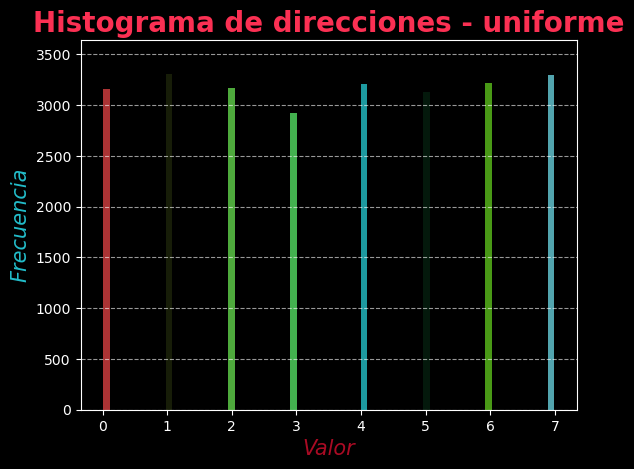

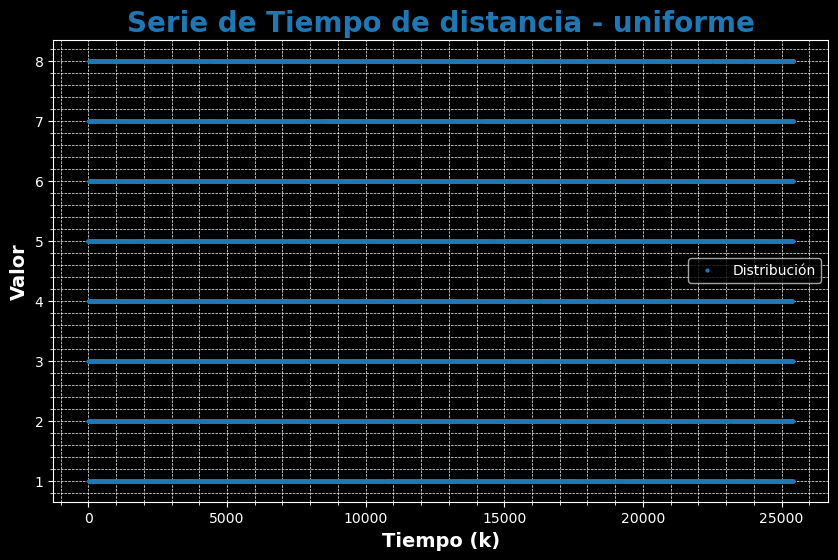

Media: 4.508381866834567
Mediana: 5.0
Moda: 7
Media Geométrica: 3.7652769716737735
Rango: 7
Desviación Estándar: 2.308121683936398
Varianza: 5.327425707857393
Percentil 20: 2.0
Cuartil 3: 7.0
Asimetría: 0.0007205614186959583
Coeficiente de Variación: 0.5119623297475865
Curtosis: -1.2664414722885056
Entropía: 2.078954443700381


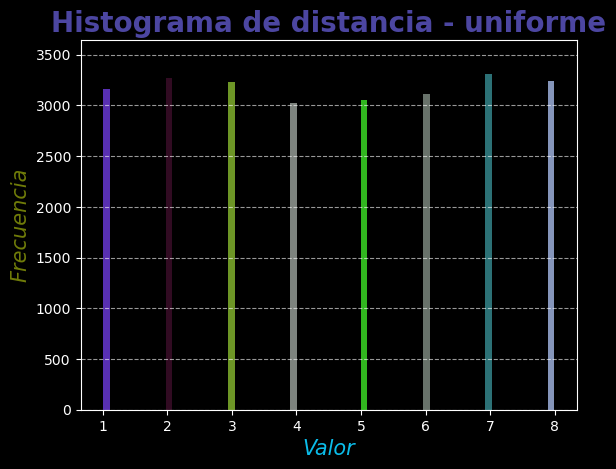

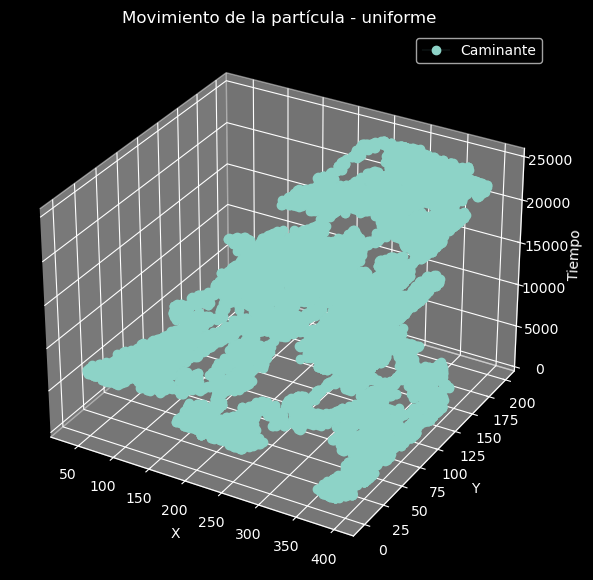

Media: (270.86592948213445, 97.1068786400126)
Mediana: (298.0, 94.0)
Moda: (399, 0)
Media Geométrica: (247.24444891893856, 0.0)
Rango: (362, 199)
Desviación Estándar: (100.05189834693284, 58.206697094915235)
Varianza: (10010.382362824983, 3388.0195866992135)
Percentil 20: (165.0, 39.0)
Cuartil 3: (361.0, 149.0)
Asimetría: (-0.4364413819889446, 0.08182116906216165)
Coeficiente de Variación: (0.3693779374106627, 0.5994085888672704)
Curtosis: (-1.1643556943594706, -1.2270161645825817)
Entropía: (5.675970866168471, 5.279873547891945)


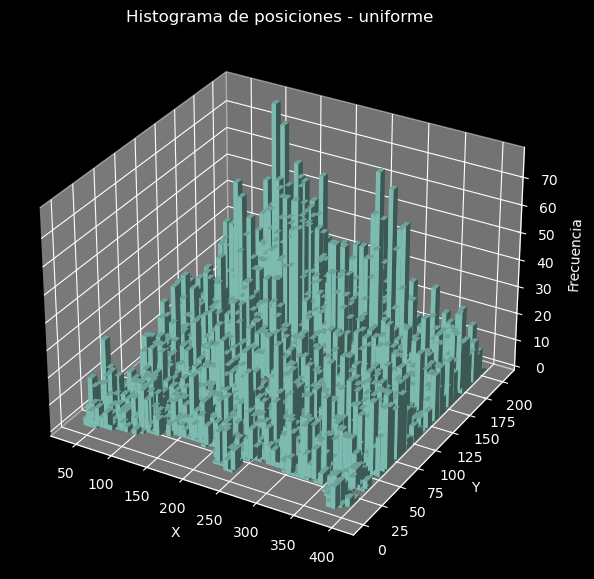

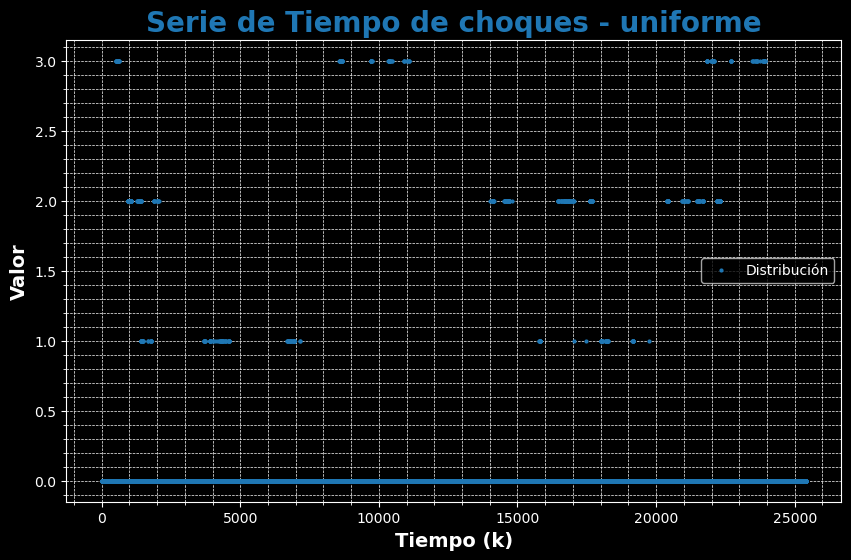

Media: 0.041988037147804184
Mediana: 0.0
Moda: 0
Media Geométrica: 0.0
Rango: 3
Desviación Estándar: 0.300603381278892
Varianza: 0.09036239283630292
Percentil 20: 0.0
Cuartil 3: 0.0
Asimetría: 7.7131802946233465
Coeficiente de Variación: 7.159262535200754
Curtosis: 61.692284077775625
Entropía: 0.12701470520696592


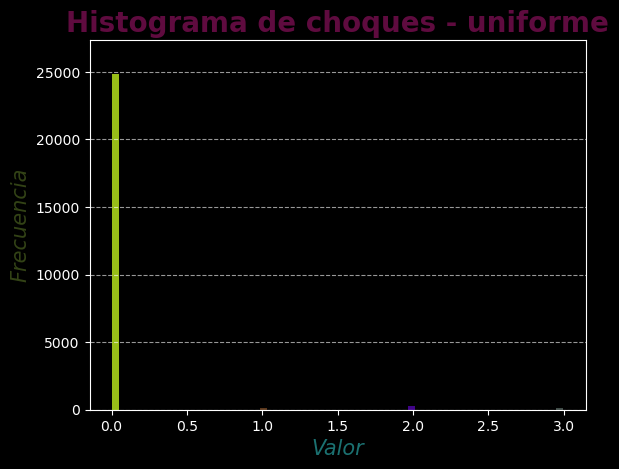

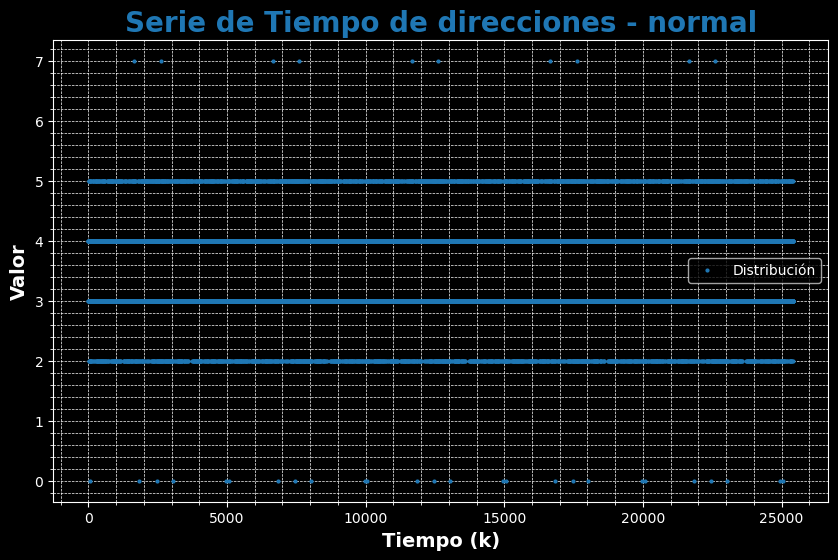

Media: 3.5058240201479616
Mediana: 4.0
Moda: 4
Media Geométrica: 0.0
Rango: 7
Desviación Estándar: 0.6919921788531713
Varianza: 0.4788531755939594
Percentil 20: 3.0
Cuartil 3: 4.0
Asimetría: -0.08213776900766163
Coeficiente de Variación: 0.19738360364818486
Curtosis: 0.5118522551036051
Entropía: 1.0414062357097533


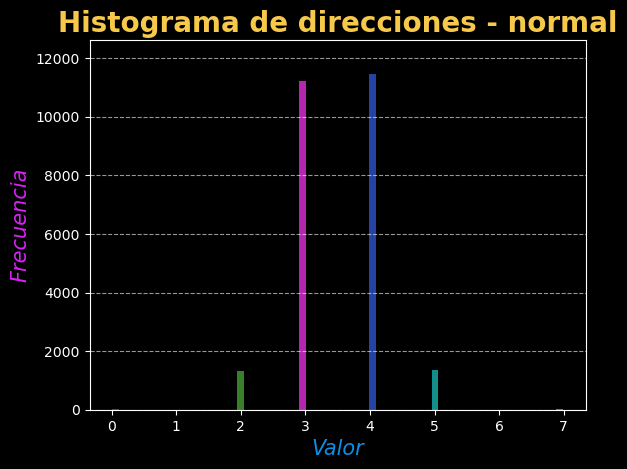

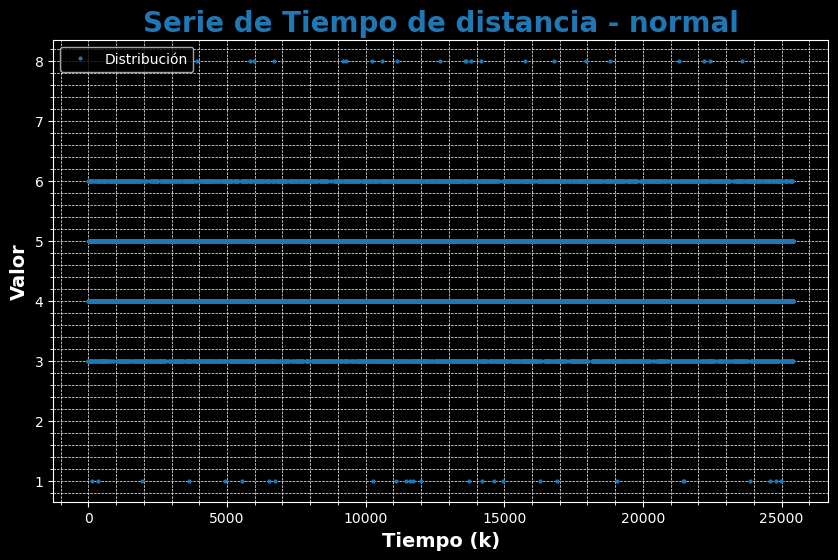

Media: 4.503423579411302
Mediana: 5.0
Moda: 5
Media Geométrica: 4.444785302224935
Rango: 7
Desviación Estándar: 0.7066948843875297
Varianza: 0.49941765961950396
Percentil 20: 4.0
Cuartil 3: 5.0
Asimetría: -0.03853514646135348
Coeficiente de Variación: 0.15692392064081845
Curtosis: 0.6791025773162027
Entropía: 1.0598571892316173


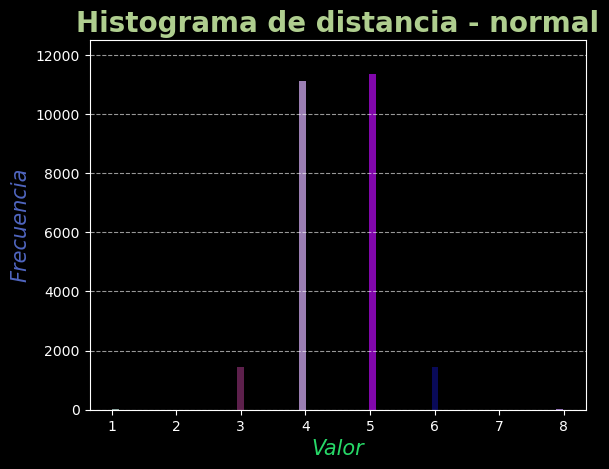

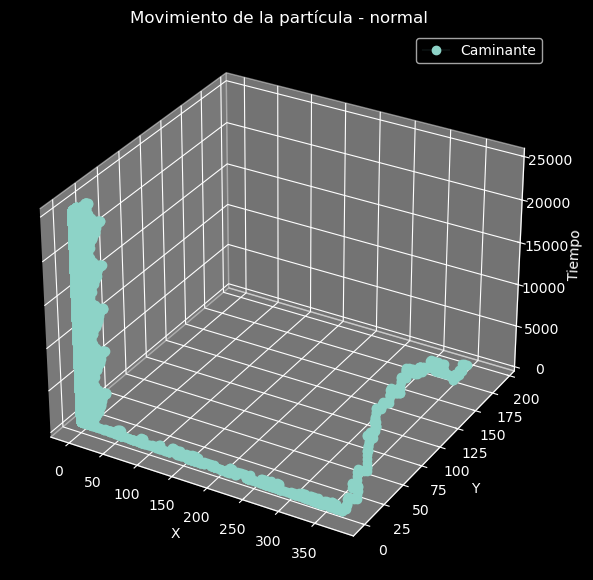

Media: (9.244372737289469, 2.3170549346765306)
Mediana: (0.0, 0.0)
Moda: (0, 0)
Media Geométrica: (0.0, 0.0)
Rango: (375, 193)
Desviación Estándar: (43.278047917590456, 13.235197664522149)
Varianza: (1872.9894315572558, 175.17045721897256)
Percentil 20: (0.0, 0.0)
Cuartil 3: (4.0, 1.0)
Asimetría: (6.578602341587842, 11.663910419215028)
Coeficiente de Variación: (4.681555920286264, 5.7120776320177455)
Curtosis: (43.600650773899, 142.69652093951595)
Entropía: (2.0939198761262903, 1.3474235171463493)


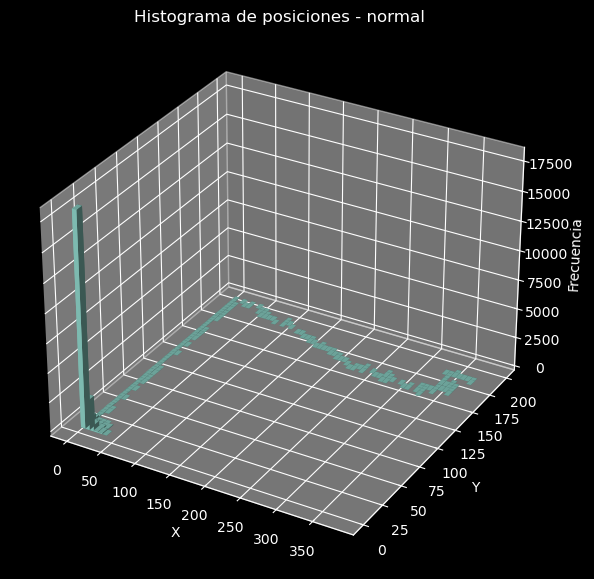

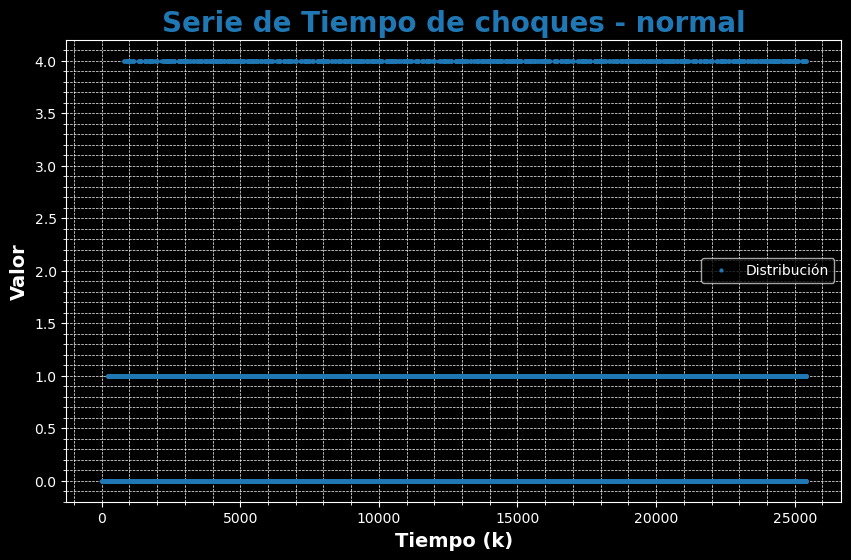

Media: 0.8091846371792853
Mediana: 1.0
Moda: 1
Media Geométrica: 0.0
Rango: 4
Desviación Estándar: 0.9735338432437292
Varianza: 0.9477681439409058
Percentil 20: 0.0
Cuartil 3: 1.0
Asimetría: 2.1084392682081528
Coeficiente de Variación: 1.2031047038131424
Curtosis: 4.816249880644364
Entropía: 0.8777600621847583


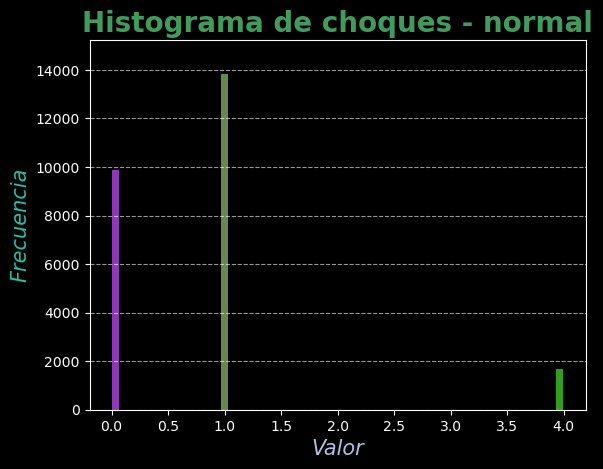

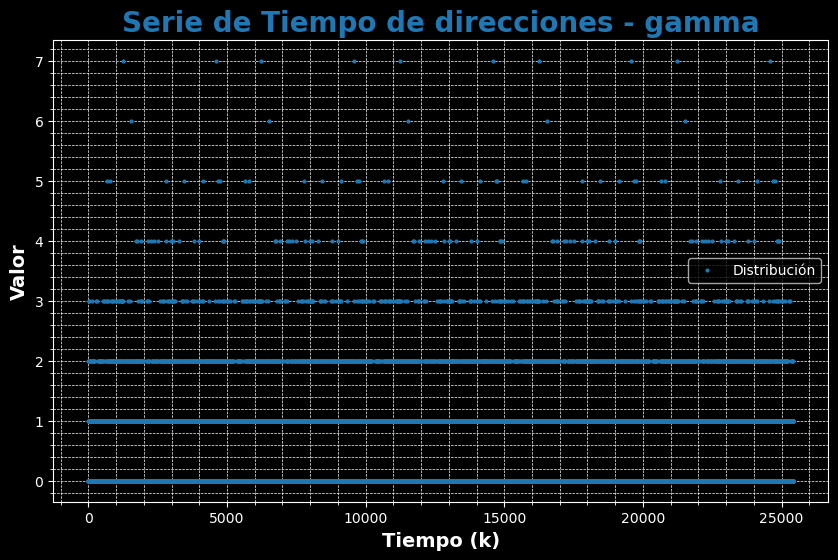

Media: 0.4113017472060444
Mediana: 0.0
Moda: 0
Media Geométrica: 0.0
Rango: 7
Desviación Estándar: 0.7268544744498452
Varianza: 0.5283174270277606
Percentil 20: 0.0
Cuartil 3: 1.0
Asimetría: 2.3257682481100233
Coeficiente de Variación: 1.7672049277381807
Curtosis: 8.07447329844748
Entropía: 0.8488958393322924


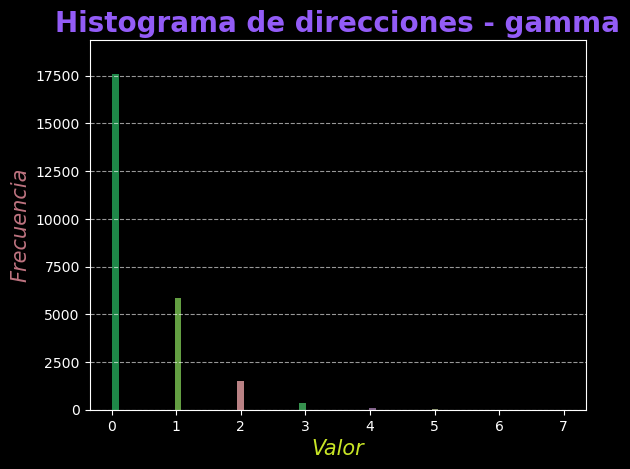

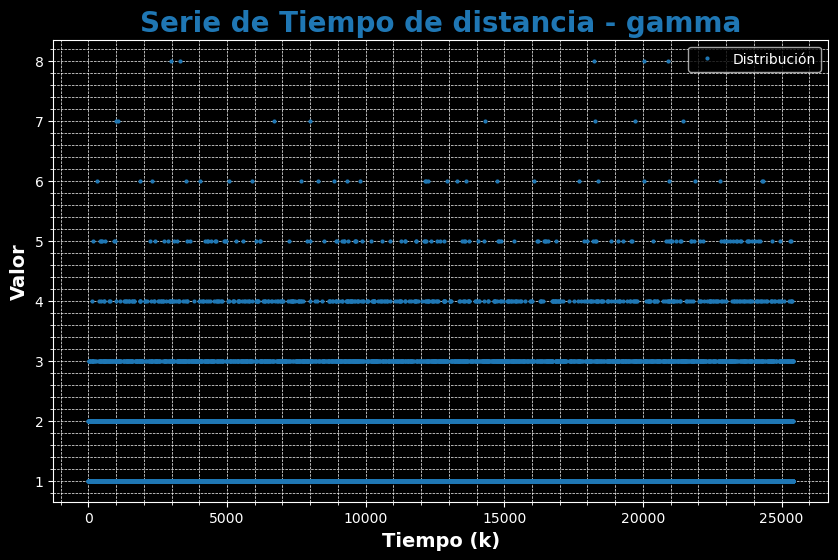

Media: 1.415079490004722
Mediana: 1.0
Moda: 1
Media Geométrica: 1.2864468727063745
Rango: 7
Desviación Estándar: 0.7395392648976116
Varianza: 0.5469183243252997
Percentil 20: 1.0
Cuartil 3: 2.0
Asimetría: 2.2900667331674875
Coeficiente de Variación: 0.5226132313564545
Curtosis: 7.174494529921597
Entropía: 0.8548916070853355


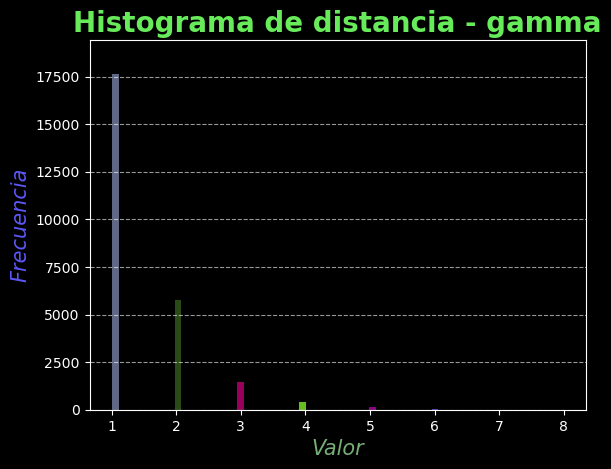

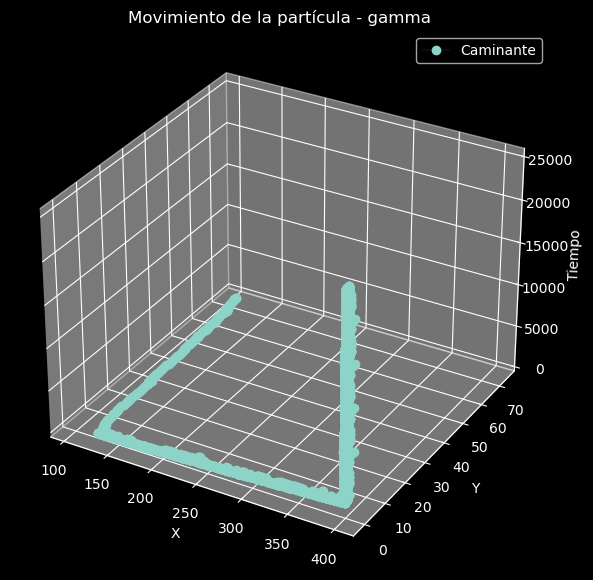

Media: (392.09271210451755, 0.25401385172359514)
Mediana: (399.0, 0.0)
Moda: (399, 0)
Media Geométrica: (389.36595075952914, 0.0)
Rango: (293, 73)
Desviación Estándar: (35.60675382729265, 2.963961389767358)
Varianza: (1267.8409181174197, 8.785067120031648)
Percentil 20: (399.0, 0.0)
Cuartil 3: (399.0, 0.0)
Asimetría: (-5.855379091038135, 19.176998030088768)
Coeficiente de Variación: (0.0908120776746322, 11.668502995626351)
Curtosis: (35.40002901847709, 390.1083260979663)
Entropía: (0.663236035446813, 0.34358084887338886)


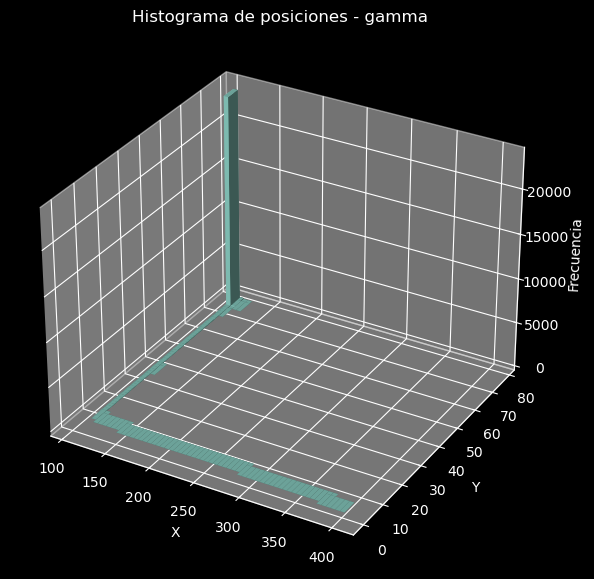

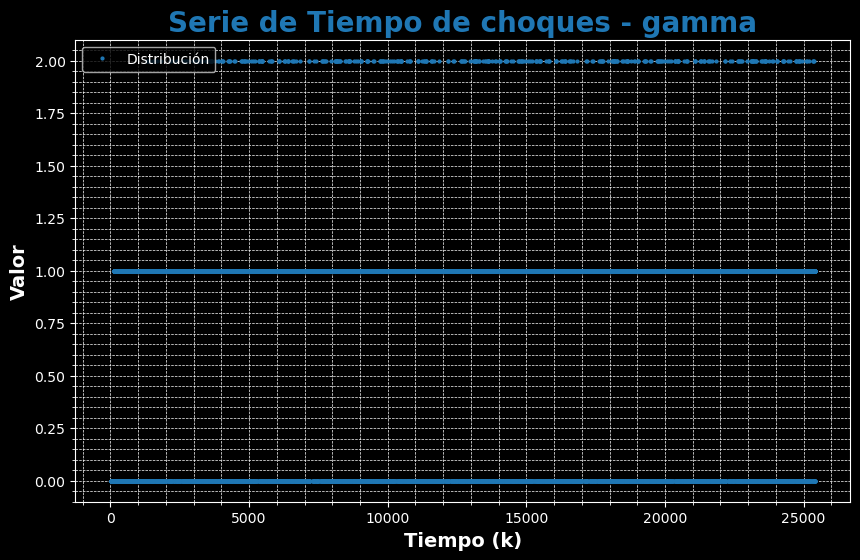

Media: 0.8547930111758224
Mediana: 1.0
Moda: 1
Media Geométrica: 0.0
Rango: 2
Desviación Estándar: 0.39267355827127426
Varianza: 0.1541925233654238
Percentil 20: 1.0
Cuartil 3: 1.0
Asimetría: -1.238417391246959
Coeficiente de Variación: 0.45937853157120073
Curtosis: 1.7015102391606307
Entropía: 0.515436904834681


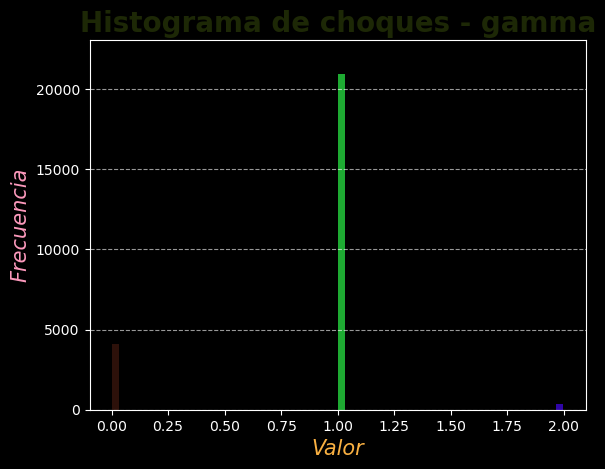

In [48]:
series = ["direcciones", "distancia", "posiciones", "choques",]
distribuciones = {"uniforme": {}, "normal":{}, "gamma":{}}

minimo = np.inf

for distribucion in distribuciones.keys():
    for serie in series:
        if serie != "posiciones":
            distribuciones[distribucion][serie] = cargar_csv(f"seriesCaminanteBlanco/{serie}_{distribucion}.txt", ",")
        else:
            distribuciones[distribucion][serie] = cargar_csv(f"seriesCaminanteBlanco/{serie}_{distribucion}.txt", ";")
        
        if len(distribuciones[distribucion][serie]) < minimo:
            minimo = len(distribuciones[distribucion][serie]) -1
            
percentil = 20
cuartil = 3
for distribucion in distribuciones.keys():
    for serie in distribuciones[distribucion].keys():
        if serie != "posiciones":
            aux = [int(distribuciones[distribucion][serie][i]) for i in range(0,minimo-1)]
            
            graficar([i for i in range(1, len(aux)+1)], aux, f"graf_{serie}_{distribucion}.pdf", f"Serie de Tiempo de {serie} - {distribucion}", "Tiempo (k)", "Valor")
            distribuciones[distribucion][serie] = DistribucionProbabilidad(aux)
            distribuciones[distribucion][serie].calcular_metricas(percentil, cuartil)
            plotear_hist(aux, f"Histograma de {serie} - {distribucion}", "Valor", "Frecuencia",  f"hist_{serie}_{distribucion}.pdf", "rice")
        else:
            distribuciones[distribucion][serie] = [tuple(map(int, distribuciones[distribucion][serie][i].split(','))) for i in range(0, minimo-1)]
            pos_x, pos_y = zip(*distribuciones[distribucion][serie])
            graficar_3d(pos_x, pos_y, f"graf_{serie}_{distribucion}.pdf", f"Movimiento de la partícula - {distribucion}")
            d_x = DistribucionProbabilidad(pos_x)
            d_y = DistribucionProbabilidad(pos_y)
            resultados = {
            'Media': (d_x.media(), d_y.media()),
            'Mediana': (d_x.mediana(), d_y.mediana()),
            'Moda': (d_x.moda(), d_y.moda()),
            'Media Geométrica': (d_x.media_geometrica(), d_y.media_geometrica()),
            'Rango': (d_x.rango(), d_y.rango()),
            'Desviación Estándar': (d_x.desviacion_estandar(), d_y.desviacion_estandar()),
            'Varianza': (d_x.varianza(), d_y.varianza()),
            f'Percentil {percentil}': (d_x.percentil(percentil), d_y.percentil(percentil)),
            f'Cuartil {cuartil}': (d_x.cuartil(cuartil), d_y.cuartil(cuartil)),
            'Asimetría': (d_x.asimetria(), d_y.asimetria()),
            'Coeficiente de Variación': (d_x.coeficiente_variacion(), d_y.coeficiente_variacion()),
            'Curtosis': (d_x.curtosis(), d_y.curtosis()),
            'Entropía': (d_x.entropia(), d_y.entropia())
            }
        
            for metrica, valor in resultados.items():
                print(f"{metrica}: {valor}")
            hist_3d(pos_x, pos_y, f"hist_{serie}_{distribucion}.pdf", f"Histograma de {serie} - {distribucion}")